In [64]:
# import custom modules wrote by julio
import importlib
import seaborn as sns
%matplotlib inline
from capstone_01 import clean_data
from capstone_01 import inferential_statistics

# reload modules without restartign the kernall (it drives me crazy)
importlib.reload(clean_data);
importlib.reload(inferential_statistics);

In [65]:
# load data and cleant it
file = './raw_data/clinical/I-SPY_1_All_Patient_Clinical_and_Outcome_Data.xlsx'
df = clean_data.clean_my_data(file)
df.head(2)

,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
SUBJECTID,,,,,,,,,,,,,,,,,
1001,38.73,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1002,37.79,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3


## Inferential_statistics
### 1. Categorical vs Categorical

In [66]:
# assign all categorical predictors
predictors = df.columns[1:7]
predictors

Index(['White', 'ER+', 'PR+', 'HR+', 'Bilateral', 'Right_Breast'], dtype='object')

In [67]:
# example of contingency table
inferential_statistics.contingency_table('ER+', 'PCR',df)

PCR,Yes,No
ER+,,
Yes,17,81
No,28,42


In [68]:
inferential_statistics.categorical_data('PCR', predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.833629,0.8878,0.5076,1.5528
ER+,0.001988,0.4337,0.2582,0.7285
PR+,0.000198,0.3219,0.1707,0.6069
HR+,0.000307,0.3831,0.2286,0.6422
Bilateral,0.689629,0.0000,0.0000,NaN
Right_Breast,0.851883,1.0965,0.6649,1.8080


In [69]:
# example of contingency table
inferential_statistics.contingency_table('White', 'Alive',df)

Alive,Yes,No
White,,
Yes,105,22
No,31,10


In [70]:
# run chi-squared test on Survival as outcome
inferential_statistics.categorical_data('Alive', predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.439359,1.0935,0.9032,1.3239
ER+,0.001135,1.3095,1.1025,1.5554
PR+,0.162557,1.1266,0.9739,1.3031
HR+,0.038917,1.1950,1.0094,1.4148
Bilateral,0.915605,1.2406,1.1511,1.3370
Right_Breast,0.729139,0.9602,0.8287,1.1125


## 2. Continous vs Ca## 2. Continous vs Categorical (ANOVA)
### 2.1 Effect of Age on PCA and Survivaltegorical (ANOVA)
### 2.1 Effect of Age on PCA and Survival

             sum_sq   df         F    PR(>F)
age        0.256505    1  1.302539  0.255394
Residual  32.689923  166       NaN       NaN


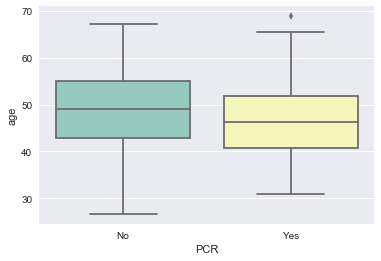

In [71]:
predictor= ['age']
outcome = 'PCR'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

             sum_sq   df         F    PR(>F)
age        0.062227    1  0.399719  0.528104
Residual  25.842534  166       NaN       NaN


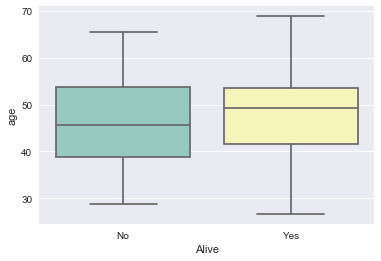

In [72]:
predictor= ['age']
outcome = 'Alive'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

### explore interactions between age, survival, and PCR

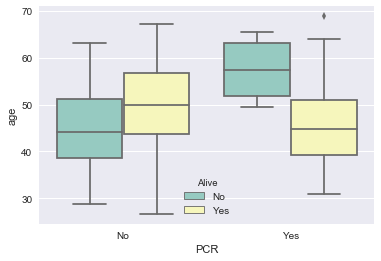

In [81]:
sns.boxplot(x= 'PCR', y='age', hue ='Alive',data=df, palette="Set3");

## The survival of patients that achieved PCR is affected by their age

            sum_sq  df         F    PR(>F)
age       0.539468   1  7.470952  0.009065
Residual  3.104976  43       NaN       NaN


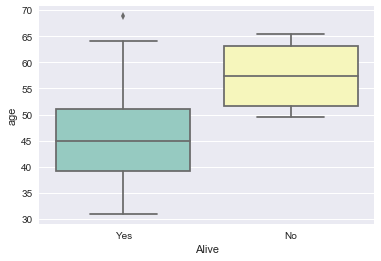

In [74]:
predictor= ['age']
outcome = 'Alive'
anova_table, OLS = inferential_statistics.linear_models(df.loc[df.PCR=='Yes',:], outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df.loc[df.PCR=='Yes',:], palette="Set3");

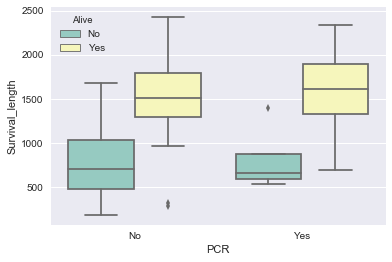

In [75]:
sns.boxplot(x= 'PCR', y='Survival_length', hue ='Alive',data=df, palette="Set3");

### 3.1 Effect of MRI measurements on PCR

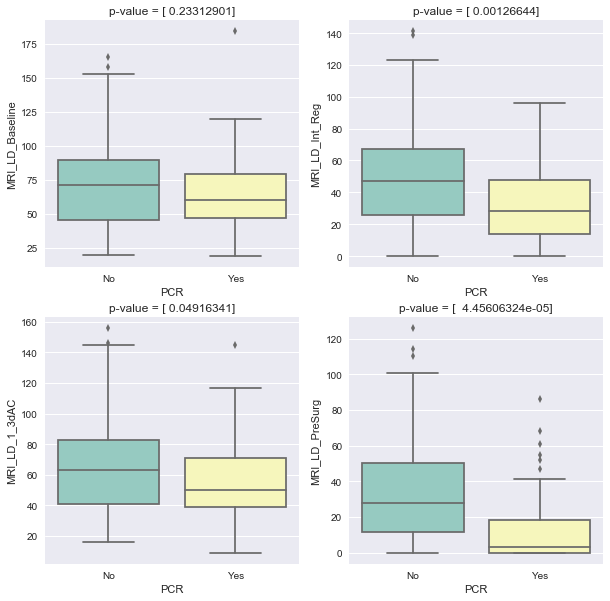

In [76]:
R = inferential_statistics.anova_MRI('PCR', df);

### 3.1 Effect of MRI measurements on Survival

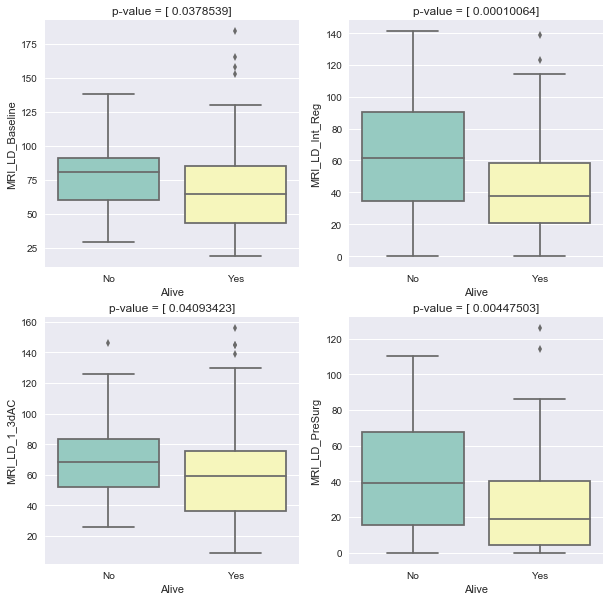

In [83]:
R = inferential_statistics.anova_MRI('Alive', df);